In [15]:
%pwd

'/Users/r/Documents/stud/ss24/finnpinn/src'

In [16]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import common

In [17]:
base_dir = Path("../data_out/finn_different_loss_patterns")
ret_files = list(common.iter_final_retardation_files(base_dir, is_ret_OK=lambda arr: np.all(arr >= 1)))
len(ret_files)

15

In [18]:
all_rets = np.stack([np.load(p) for p in ret_files], axis=0).squeeze()

### Plot all Retardations

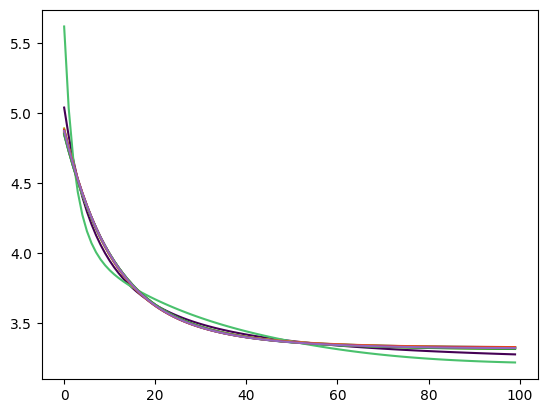

In [19]:
colormap = cm.viridis
colors = colormap(np.linspace(0, 1, 8))
lines = plt.plot(all_rets.T, alpha=1.0)

for line, color in zip(lines, colors):
    line.set_color(color)

plt.show()

# Compute Envelope Curve

In [20]:
envelope_curve_up = np.max(all_rets, axis=0)
envelope_curve_down = np.min(all_rets, axis=0)

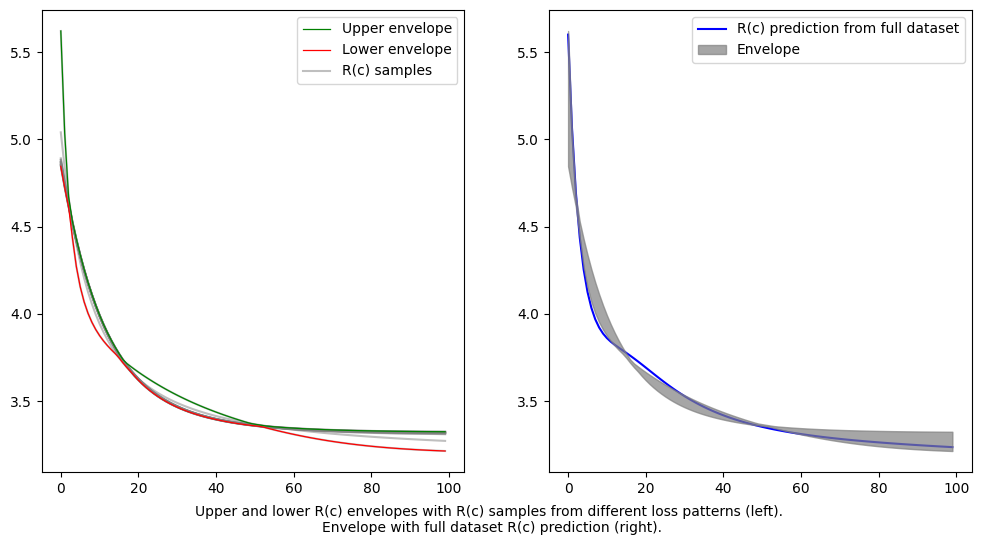

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.plot(envelope_curve_up, "g-", lw=0.9, label="Upper envelope")
ax1.plot(envelope_curve_down, "r-", lw=0.9, label="Lower envelope")
lines = ax1.plot(all_rets.T, color="grey", alpha=0.5, zorder=-2)
lines[-1].set_label("R(c) samples")
ax1.legend()

# compare with full dataset prediction
ret_full_c = np.load("../data_out/default_finn/predicted_retardations/retPred_100.npy")
ax2.plot(ret_full_c, "b-", label="R(c) prediction from full dataset", zorder=-2)
ax2.fill_between(x=np.arange(envelope_curve_up.shape[0]), y1=envelope_curve_down, y2=envelope_curve_up, color='gray', alpha=0.7, label="Envelope")
ax2.legend()

fig.text(0.5, 0.01, "Upper and lower R(c) envelopes with R(c) samples from different loss patterns (left). \nEnvelope with full dataset R(c) prediction (right).", ha="center")

plt.show()

# Compare different envelopes from different "methods"

In [31]:
df_increasing_time

,retardation_file_paths,num_time_steps,num_epochs
0,../data_out/finn_increasing_time/finn_increasi...,3,100
1,../data_out/finn_increasing_time/finn_increasi...,4,100
2,../data_out/finn_increasing_time/finn_increasi...,5,100
3,../data_out/finn_increasing_time/finn_increasi...,6,100
4,../data_out/finn_increasing_time/finn_increasi...,7,100
5,../data_out/finn_increasing_time/finn_increasi...,9,100
6,../data_out/finn_increasing_time/finn_increasi...,12,100


In [32]:
import pandas as pd

envelope_curve_up_loss_patterns = envelope_curve_up.copy()
envelope_curve_down_loss_patterns = envelope_curve_down.copy()


df_running_intervals = pd.read_csv("../data_out/running_intervals_ret_files.csv", index_col=0)
all_rets = np.stack([np.load(p) for p in df_running_intervals["retardation_file_paths"]], axis=0).squeeze()
envelope_curve_up_running_intervals = np.max(all_rets, axis=0)
envelope_curve_down_running_intervals = np.min(all_rets, axis=0)


df_increasing_time = pd.read_csv("../data_out/increasing_time_ret_files.csv", index_col=0)
all_rets = np.stack([np.load(p) for p in df_increasing_time["retardation_file_paths"]], axis=0).squeeze()
envelope_curve_up_increasing_time = np.max(all_rets, axis=0)
envelope_curve_down_increasing_time = np.min(all_rets, axis=0)


df_different_seeds = pd.read_csv("../data_out/different_seeds_ret_files.csv", index_col=0)
all_rets = np.stack([np.load(p) for p in df_different_seeds["retardation_file_paths"]], axis=0).squeeze()
envelope_curve_up_different_seeds = np.max(all_rets, axis=0)
envelope_curve_down_different_seeds = np.min(all_rets, axis=0)

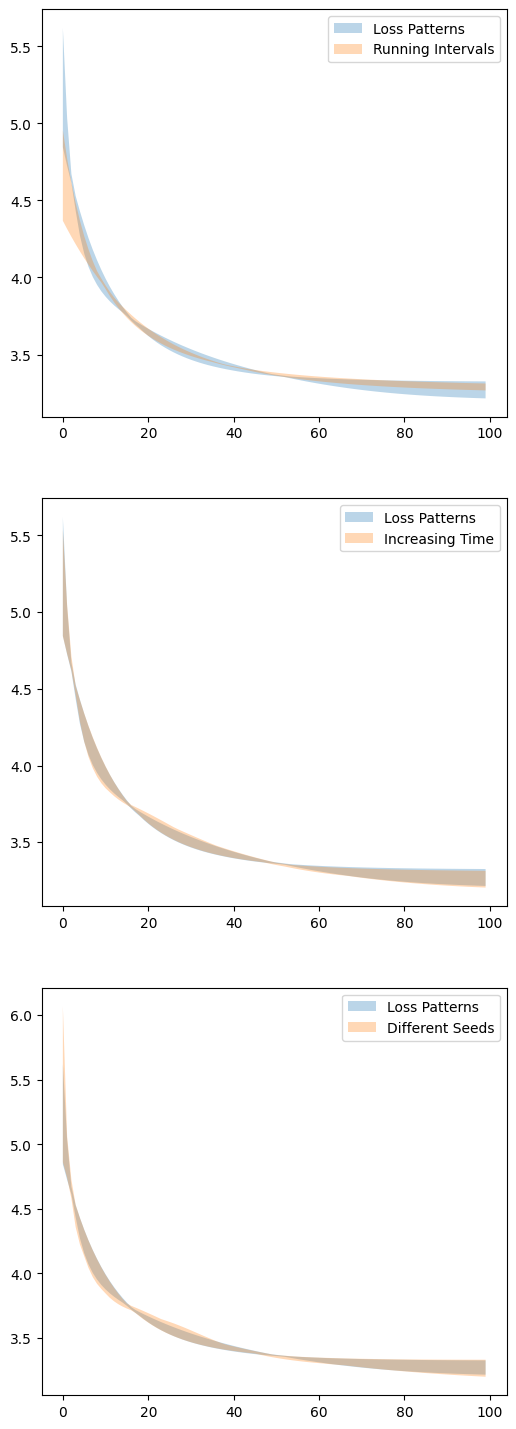

In [34]:

fig, axs = plt.subplots(nrows=3, figsize=(6, 18))


axs[0].fill_between(x=np.arange(envelope_curve_up_loss_patterns.shape[0]), y1=envelope_curve_down_loss_patterns, y2=envelope_curve_up_loss_patterns, alpha=0.3, label="Loss Patterns")
axs[0].fill_between(x=np.arange(envelope_curve_up_running_intervals.shape[0]), y1=envelope_curve_down_running_intervals, y2=envelope_curve_up_running_intervals, alpha=0.3, label="Running Intervals")
axs[0].legend()

axs[1].fill_between(x=np.arange(envelope_curve_up_loss_patterns.shape[0]), y1=envelope_curve_down_loss_patterns, y2=envelope_curve_up_loss_patterns, alpha=0.3, label="Loss Patterns")
axs[1].fill_between(x=np.arange(envelope_curve_up_increasing_time.shape[0]), y1=envelope_curve_down_increasing_time, y2=envelope_curve_up_increasing_time, alpha=0.3, label="Increasing Time")
axs[1].legend()

axs[2].fill_between(x=np.arange(envelope_curve_up_loss_patterns.shape[0]), y1=envelope_curve_down_loss_patterns, y2=envelope_curve_up_loss_patterns, alpha=0.3, label="Loss Patterns")
axs[2].fill_between(x=np.arange(envelope_curve_up_different_seeds.shape[0]), y1=envelope_curve_down_different_seeds, y2=envelope_curve_up_different_seeds, alpha=0.3, label="Different Seeds")
axs[2].legend()

plt.show()